Classification metrics in scikit-learn

Classification metrics are implemented in scikit-learn using functions from the sklearn.metrics module. These functions take an array of observed output values and an array of predicted values. Additional details and parameters can be found in the metrics documentation.

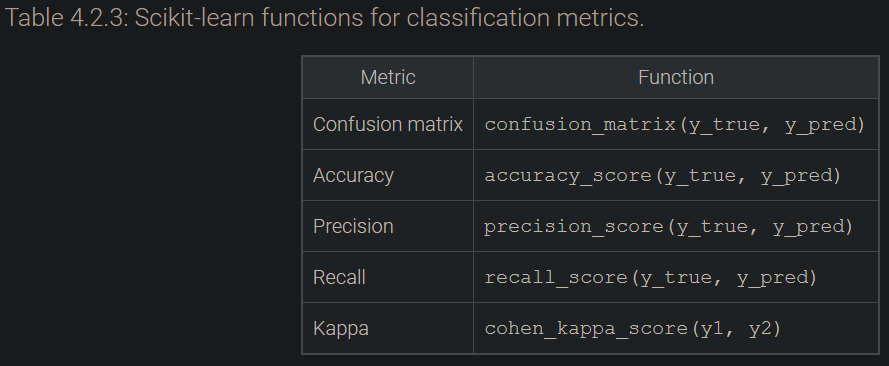

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load the diabetes dataset
diabetes_full = pd.read_csv('diabetesNHANES.csv')

# Select a random sample of 100 instances
seed = 9876
diabetes = diabetes_full.sample(n=100, random_state=seed)
diabetes.head()

,SEQN,diabetes,glucose,insulin,cholesterol,outcome,systolic,diastolic
753,97367,no,5.66,2.95,170,0,69,117
1247,96224,no,5.38,6.19,218,0,77,109
118,96245,yes,9.05,14.49,155,1,69,139
472,102526,no,5.38,5.10,191,0,87,138
1311,102586,no,5.33,7.11,236,0,79,139


In [3]:
# Define input and output features
X = diabetes[['glucose', 'cholesterol']]
y = diabetes[['outcome']]

# Scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
# Intialize and fit a k-nearest neighbors model with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, np.ravel(y))

# Calculate the predictions for each instance in X
knnypred = knn.predict(X)

In [5]:
# Initialize and fit a logistic regression model
lrm = LogisticRegression()
lrm.fit(X, np.ravel(y))

# Calculate the predictions for each instance in X
lrmypred = lrm.predict(X)

In [6]:
# calculate the confusion matrix for each model
print("KNN model \n", metrics.confusion_matrix(np.ravel(y), knnypred))
print("LR model \n", metrics.confusion_matrix(np.ravel(y), lrmypred))

KNN model 
 [[74  4]
 [ 6 16]]
LR model 
 [[77  1]
 [13  9]]


In [7]:
# calculate the accuracy for each model
print("KNN model accuracy:", metrics.accuracy_score(np.ravel(y), knnypred))
print("LR model accuracy:", metrics.accuracy_score(np.ravel(y), lrmypred))

KNN model accuracy: 0.9
LR model accuracy: 0.86


In [8]:
# calculate the precision for each model
print("KNN model precision:", metrics.precision_score(np.ravel(y), knnypred))
print("LR model precision:", metrics.precision_score(np.ravel(y), lrmypred))

KNN model precision: 0.8
LR model precision: 0.9


In [9]:
# calculate the recall for each model
print("KNN model recall:", metrics.recall_score(np.ravel(y), knnypred))
print("LR model recall:", metrics.recall_score(np.ravel(y), lrmypred))

KNN model recall: 0.7272727272727273
LR model recall: 0.4090909090909091


In [10]:
# calculate the accuracy for each model
print("KNN model kappa:", metrics.cohen_kappa_score(np.ravel(y), knnypred))
print("LR model kappa:", metrics.cohen_kappa_score(np.ravel(y), lrmypred))

KNN model kappa: 0.6987951807228916
LR model kappa: 0.4927536231884059
